### Trimet data

June 2018

John Burt
Portland Data Science Group 

This is a quick and dirty analysis of Max line delays, with a histogram of delay values, and plots of mean +/- std delay grouped by nextLocID, day of year, day of week, and hour.


In [130]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

#%matplotlib inline
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

#*********************************************************************
events = pd.read_csv('./data/events_month.csv')
trips = pd.read_csv('./data/trips_month.csv')

# convert date/times tring to deattime col
events['time'] = pd.to_datetime(events.timestamp)

# localize from UTC time
events['time'] = events['time'].dt.tz_localize('utc').dt.tz_convert('US/Pacific')

# create some time categories to group and plot data by
events['hour'] = events['time'].dt.hour
events['dayofyear'] = events['time'].dt.dayofyear
events['dayofweek'] = events['time'].dt.dayofweek


In [131]:
events.head()

,bearing,delay,timestamp,lastLocID,lastStopSeq,nextLocID,nextStopSeq,signMessageLong,tripID,vehicle_id,vehicle_location_longitude,vehicle_location_latitude,time,hour,dayofyear,dayofweek
0,42,-138,2017-01-01 00:05:35,10572,23,10574,24,MAX Red Line to Airport,6997146,416,-122.563200,45.560901,2016-12-31 16:05:35-08:00,16,366,5
1,270,-107,2017-01-01 00:07:26,10574,24,10576,25,MAX Red Line to Airport,6997146,416,-122.561480,45.572588,2016-12-31 16:07:26-08:00,16,366,5
2,299,-138,2017-01-01 00:10:39,10576,25,10579,26,MAX Red Line to Airport,6997146,416,-122.571721,45.580453,2016-12-31 16:10:39-08:00,16,366,5
3,1,-136,2017-01-01 00:04:51,11616,22,10572,23,MAX Red Line to Airport,6997146,416,-122.567106,45.556137,2016-12-31 16:04:51-08:00,16,366,5
4,42,-138,2017-01-01 00:05:35,10572,23,10574,24,MAX Red Line to Airport,6997146,417,-122.563200,45.560901,2016-12-31 16:05:35-08:00,16,366,5


In [132]:
# Number of events
events.shape

(833613, 16)

In [133]:
# range of delay values
print(events.delay.min(),events.delay.max())

-1000 597


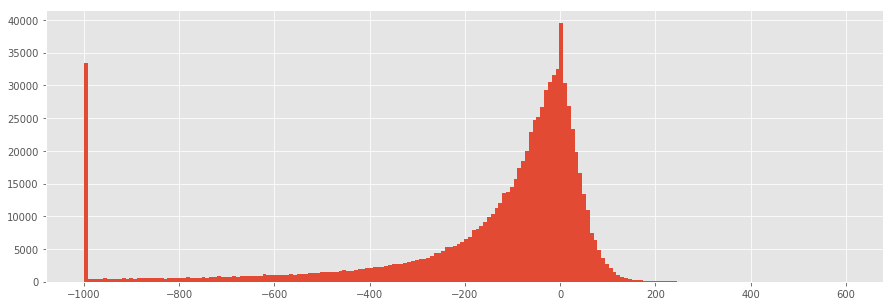

In [134]:
# histogram of delay values
events.delay.hist(bins=200,figsize=(15,5));

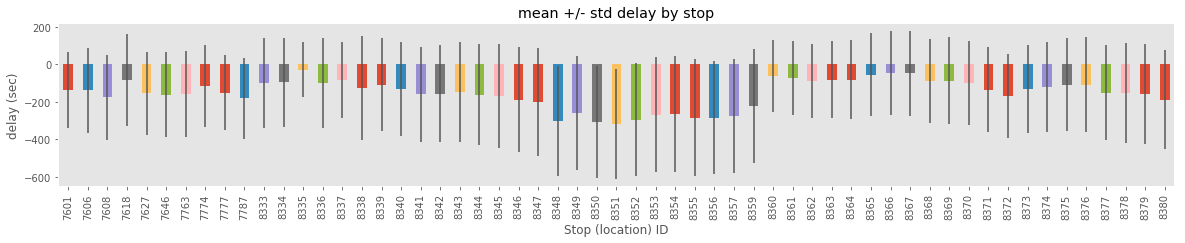

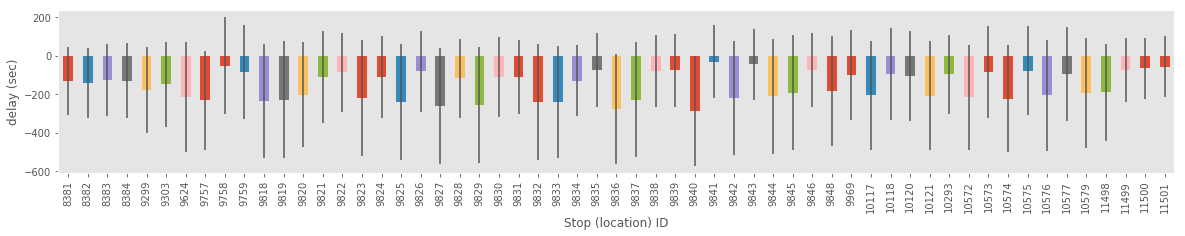

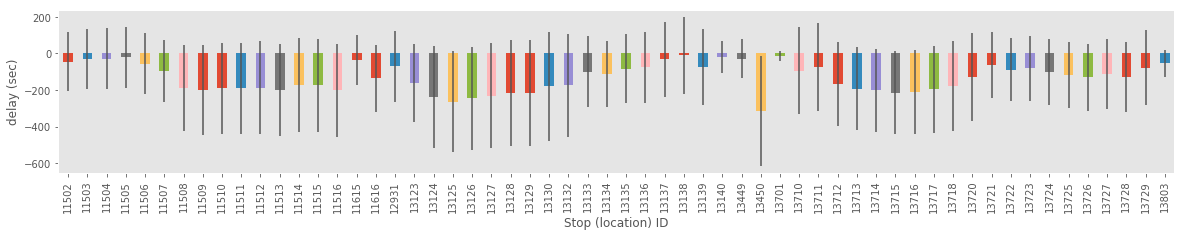

In [135]:
# plot bar chart of mean +/- std delays grouped by nextLocID (next stop ID)
# NOTE: have to plot all stops in three graphs

groupcol = 'nextLocID'
groupmean = events.groupby(groupcol).mean().reset_index()
groupmean['std'] = events.groupby(groupcol).std().reset_index().delay
groupmean = groupmean.sort_values(groupcol)

numbars = int(groupmean.shape[0]/3)

groupmean.iloc[:numbars,:].plot.bar(x=groupcol,y='delay',yerr='std',grid=False,figsize=(20,3), legend=False)
plt.title('mean +/- std delay by stop')
plt.ylabel('delay (sec)')
plt.xlabel('Stop (location) ID')

groupmean.iloc[numbars:numbars*2,:].plot.bar(x=groupcol,y='delay',yerr='std',grid=False,figsize=(20,3), legend=False)
plt.ylabel('delay (sec)')
plt.xlabel('Stop (location) ID')

groupmean.iloc[numbars*2:,:].plot.bar(x=groupcol,y='delay',yerr='std',grid=False,figsize=(20,3), legend=False);
plt.ylabel('delay (sec)')
plt.xlabel('Stop (location) ID');


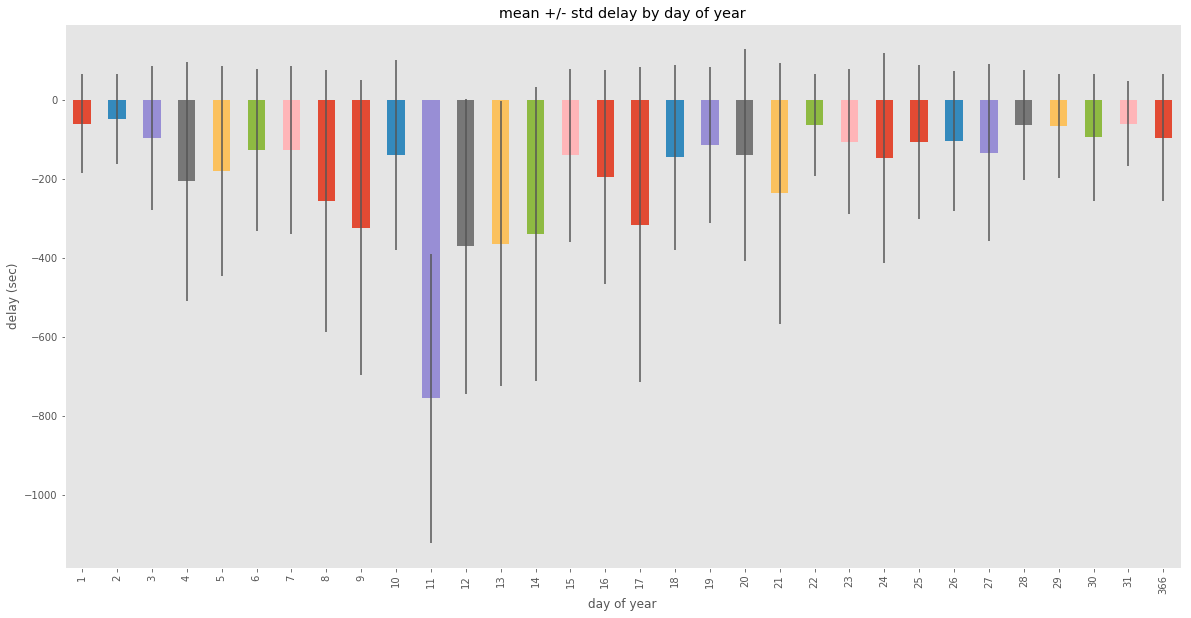

In [136]:
# plot bar chart of mean +/- std delays grouped by julian day of the year

groupcol = 'dayofyear'
groupmean = events.groupby(groupcol).mean().reset_index()
groupmean['std'] = events.groupby(groupcol).std().reset_index().delay
groupmean = groupmean.sort_values(groupcol)

groupmean.plot.bar(x=groupcol,y='delay',yerr='std',grid=False,figsize=(20,10), legend=False)
plt.ylabel('delay (sec)')
plt.xlabel('day of year')
plt.title('mean +/- std delay by day of year');


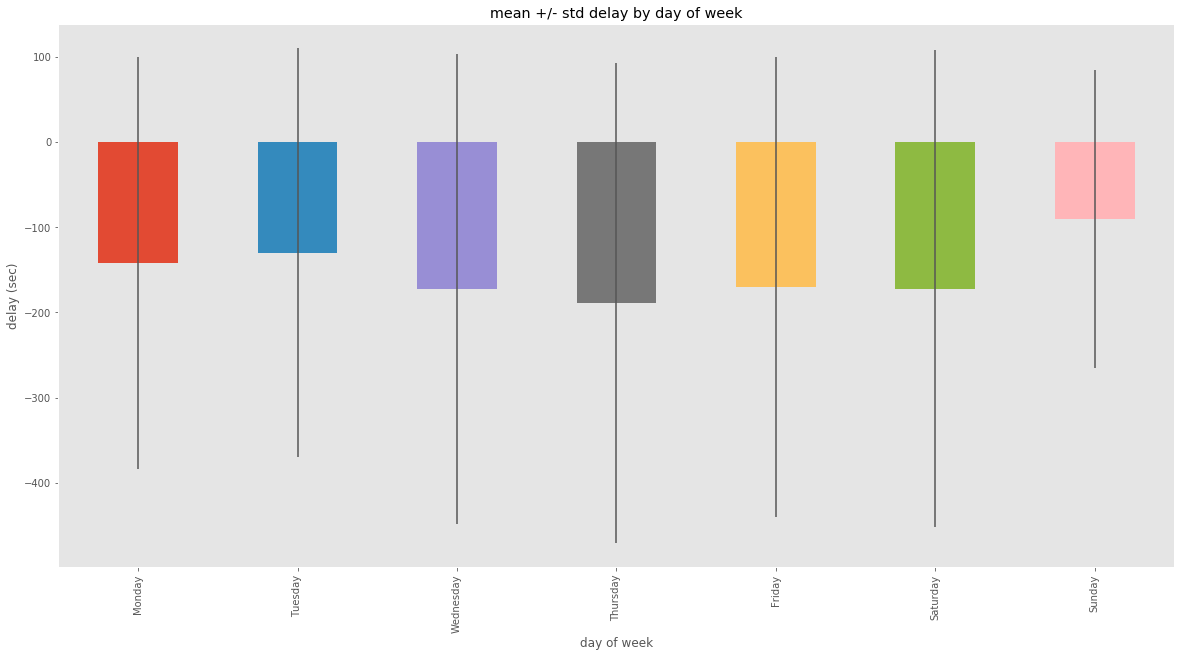

In [137]:
# plot bar chart of mean +/- std delays grouped by day of the week

groupcol = 'dayofweek'
groupmean = events.groupby(groupcol).mean().reset_index()
groupmean['std'] = events.groupby(groupcol).std().reset_index().delay
groupmean = groupmean.sort_values(groupcol)

# create day name column for plot
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
groupmean['dayname'] = groupmean['dayofweek'].map(dayOfWeek)

groupmean.plot.bar(x='dayname',y='delay',yerr='std',grid=False,figsize=(20,10),legend=False)
plt.ylabel('delay (sec)')
plt.xlabel('day of week')
plt.title('mean +/- std delay by day of week');


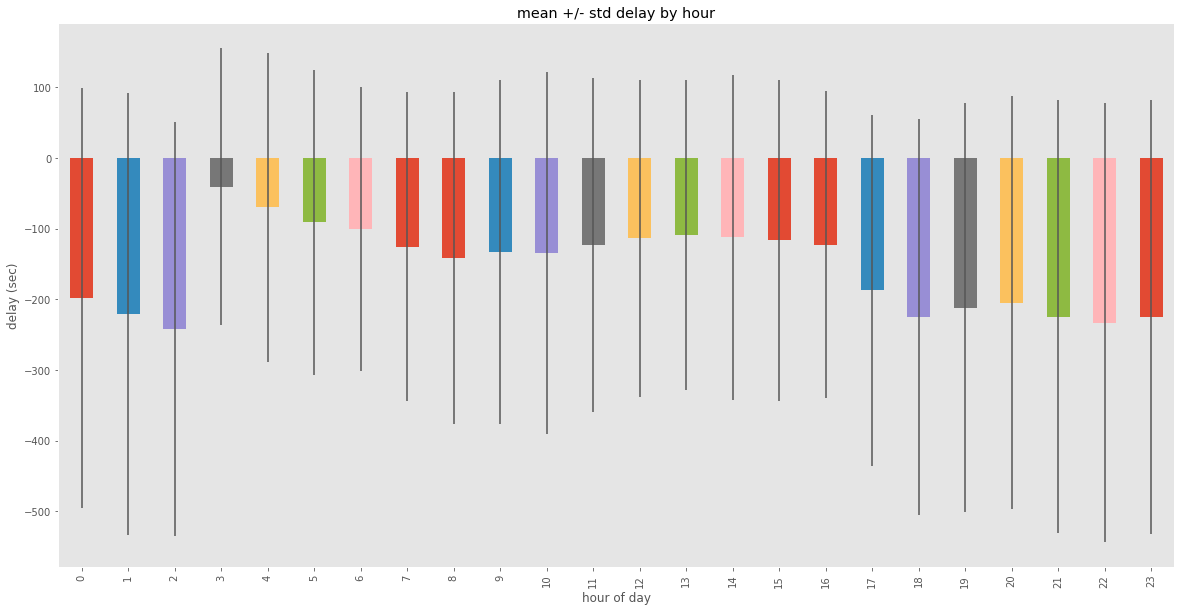

In [138]:
# plot bar chart of mean +/- std delays grouped by hour of the day

groupcol = 'hour'
groupmean = events.groupby(groupcol).mean().reset_index()
groupmean['std'] = events.groupby(groupcol).std().reset_index().delay
groupmean = groupmean.sort_values(groupcol)

groupmean.plot.bar(x=groupcol,y='delay',yerr='std',grid=False,figsize=(20,10), legend=False)
plt.ylabel('delay (sec)')
plt.xlabel('hour of day')
plt.title('mean +/- std delay by hour');
